In [1]:
import pandas as pd
import numpy as np

In [2]:
veri=pd.read_csv("veriseti_20220203_olimpiyatlar.csv")
veri.head()

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Gender  271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [4]:
veri.columns

Index(['ID', 'Name', 'Gender', 'Age', 'Height', 'Weight', 'Team', 'NOC',
       'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [5]:
veri=veri.drop(["ID","Games"],axis=1)
veri.head()

,Name,Gender,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [6]:
veri.rename(columns={"Name":"isim",
                     "Gender":"cinsiyet",
                     "Age":"yas",
                     'Height': 'boy', 
                     'Weight': 'kilo', 
                     'Team'  : 'takim', 
                     'NOC'   : 'uok', 
                     'Year'  : 'yil', 
                     'Season': 'sezon', 
                     'City'  : 'sehir',
                     'Sport' : 'spor',
                     'Event' : 'etkinlik',
                     'Medal' : 'madalya'},inplace=True) #isimleri değişen column'lar otomatik veriye kaydedilir.
veri.head()

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [7]:
#Boy ve kilo sütununda bulunan kayıp veriyi etkinlik ortalamasına göre dolduralım.
essiz_etkinlik=pd.unique(veri.etkinlik)
print("Essiz etkinlik sayısı:{}".format(len(essiz_etkinlik)))
print(type(essiz_etkinlik))
essiz_etkinlik[:10]

Essiz etkinlik sayısı:765
<class 'numpy.ndarray'>


array(["Basketball Men's Basketball", "Judo Men's Extra-Lightweight",
       "Football Men's Football", "Tug-Of-War Men's Tug-Of-War",
       "Speed Skating Women's 500 metres",
       "Speed Skating Women's 1,000 metres",
       "Cross Country Skiing Men's 10 kilometres",
       "Cross Country Skiing Men's 50 kilometres",
       "Cross Country Skiing Men's 10/15 kilometres Pursuit",
       "Cross Country Skiing Men's 4 x 10 kilometres Relay"], dtype=object)

In [8]:
veri_gecici=veri.copy()
boy_kilo_list=["boy","kilo"]

for e in essiz_etkinlik:
    etkinlik_filtre=veri_gecici.etkinlik==e

    veri_filtreli=veri_gecici[etkinlik_filtre]

    for s in boy_kilo_list:
        ort=np.round(np.mean(veri_filtreli[s]),2)
        if ~np.isnan(ort):
            veri_filtreli[s]=veri_filtreli[s].fillna(ort)
        else:
            tum_veri_ort=np.round(np.mean(veri[s]),2)
            veri_filtreli[s]=veri_filtreli[s].fillna(tum_veri_ort)
    
    veri_gecici[etkinlik_filtre]=veri_filtreli

veri=veri_gecici.copy()
veri.info()


C:\Users\Ertuğrul\AppData\Local\Temp\ipykernel_16020\286880255.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veri_filtreli[s]=veri_filtreli[s].fillna(ort)
C:\Users\Ertuğrul\AppData\Local\Temp\ipykernel_16020\286880255.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veri_filtreli[s]=veri_filtreli[s].fillna(tum_veri_ort)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   isim      271116 non-null  object 
 1   cinsiyet  271116 non-null  object 
 2   yas       261642 non-null  float64
 3   boy       271116 non-null  float64
 4   kilo      271116 non-null  float64
 5   takim     271116 non-null  object 
 6   uok       271116 non-null  object 
 7   yil       271116 non-null  int64  
 8   sezon     271116 non-null  object 
 9   sehir     271116 non-null  object 
 10  spor      271116 non-null  object 
 11  etkinlik  271116 non-null  object 
 12  madalya   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


In [9]:
yas_ort=np.round(np.mean(veri.yas),2)
veri.yas=veri.yas.fillna(yas_ort)
print("yaş ortalaması:{}".format(yas_ort))
veri.info()

yaş ortalaması:25.56
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   isim      271116 non-null  object 
 1   cinsiyet  271116 non-null  object 
 2   yas       271116 non-null  float64
 3   boy       271116 non-null  float64
 4   kilo      271116 non-null  float64
 5   takim     271116 non-null  object 
 6   uok       271116 non-null  object 
 7   yil       271116 non-null  int64  
 8   sezon     271116 non-null  object 
 9   sehir     271116 non-null  object 
 10  spor      271116 non-null  object 
 11  etkinlik  271116 non-null  object 
 12  madalya   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


In [10]:
#Madalya alamayanları çıkaralım.
madalya_degisken=veri["madalya"]
pd.isnull(madalya_degisken).sum()

231333

In [11]:
madalya_degisken_filtre=~pd.isnull(madalya_degisken)
veri=veri[madalya_degisken_filtre]
veri.head(5)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [12]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39783 entries, 3 to 271103
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   isim      39783 non-null  object 
 1   cinsiyet  39783 non-null  object 
 2   yas       39783 non-null  float64
 3   boy       39783 non-null  float64
 4   kilo      39783 non-null  float64
 5   takim     39783 non-null  object 
 6   uok       39783 non-null  object 
 7   yil       39783 non-null  int64  
 8   sezon     39783 non-null  object 
 9   sehir     39783 non-null  object 
 10  spor      39783 non-null  object 
 11  etkinlik  39783 non-null  object 
 12  madalya   39783 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 4.2+ MB


In [13]:
veri.to_csv("olimpiyat_madalyali.csv",index=False)

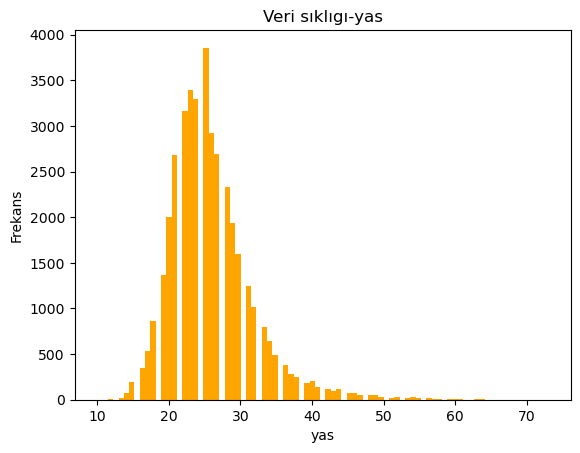

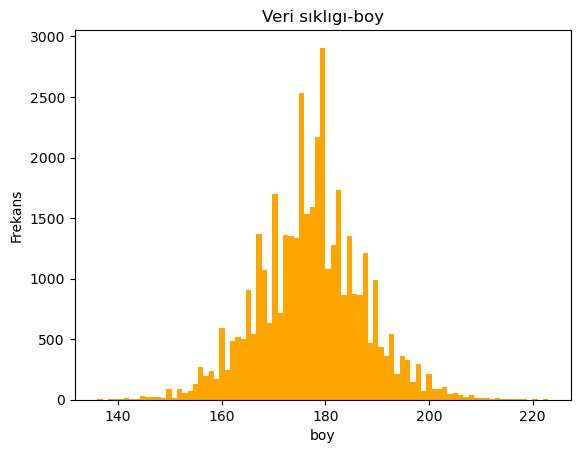

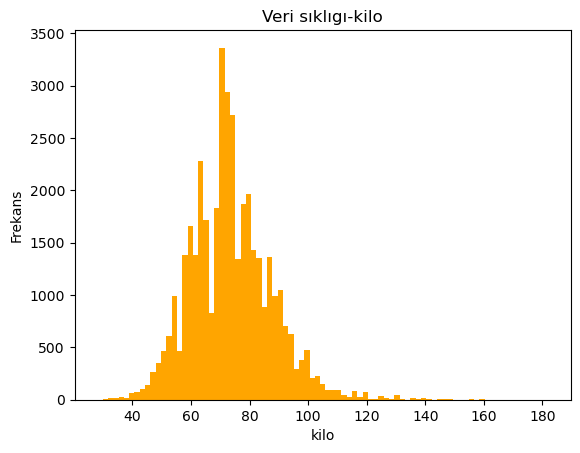

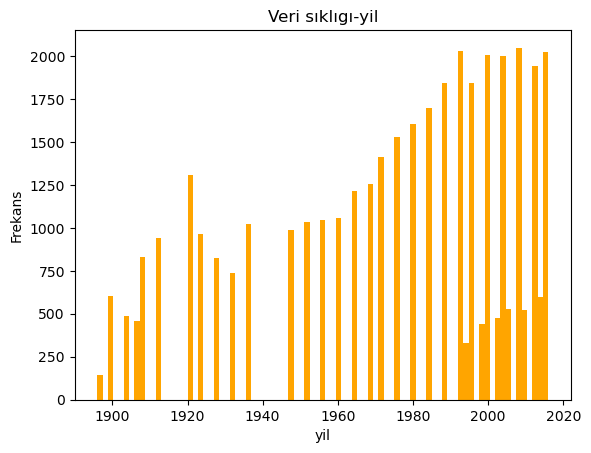

In [14]:
import matplotlib.pyplot as plt
from collections import Counter
def plotHistogram(degisken):
    plt.figure()
    plt.hist(veri[degisken],bins=85,color="orange")
    plt.xlabel(degisken)
    plt.ylabel("Frekans")
    plt.title("Veri sıklıgı-{}".format(degisken))
    plt.show()

sayisal_degiskenler=["yas","boy","kilo","yil"]
for i in sayisal_degiskenler:
    plotHistogram(i)

In [15]:
veri.describe()

,yas,boy,kilo,yil
count,39783.000000,39783.000000,39783.000000,39783.000000
mean,25.918456,177.336690,73.738320,1973.943845
std,5.859569,10.170124,13.979041,33.822857
min,10.000000,136.000000,28.000000,1896.000000
25%,22.000000,170.000000,64.000000,1952.000000
50%,25.000000,177.480000,73.000000,1984.000000
75%,29.000000,184.000000,82.000000,2002.000000
max,73.000000,223.000000,182.000000,2016.000000


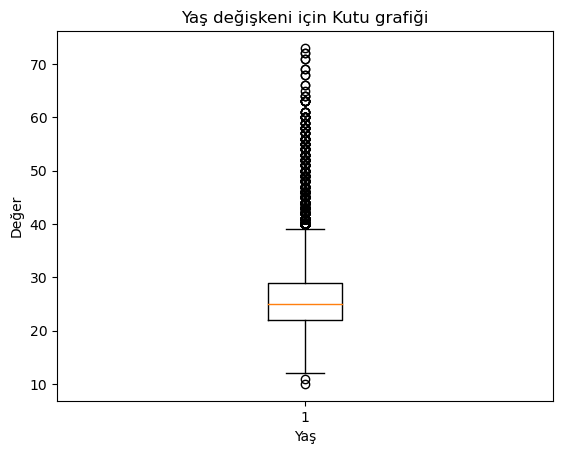

In [16]:
plt.boxplot(veri.yas)
plt.title("Yaş değişkeni için Kutu grafiği")
plt.xlabel("Yaş")
plt.ylabel("Değer")
plt.show()

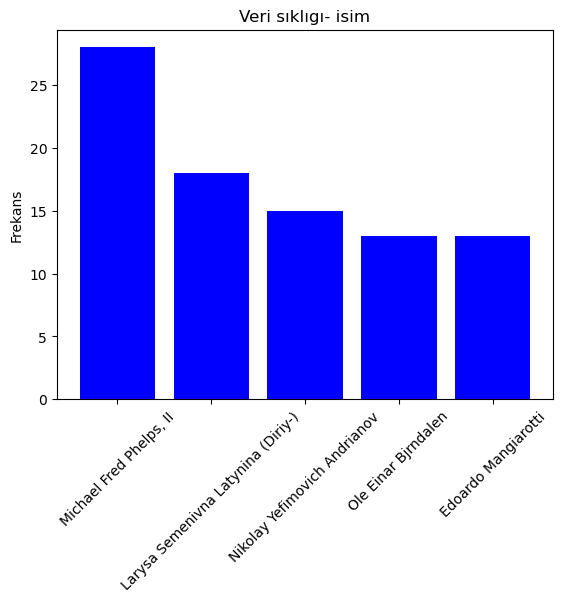

isim:
Michael Fred Phelps, II               28
Larysa Semenivna Latynina (Diriy-)    18
Nikolay Yefimovich Andrianov          15
Ole Einar Bjrndalen                   13
Edoardo Mangiarotti                   13
Name: isim, dtype: int64


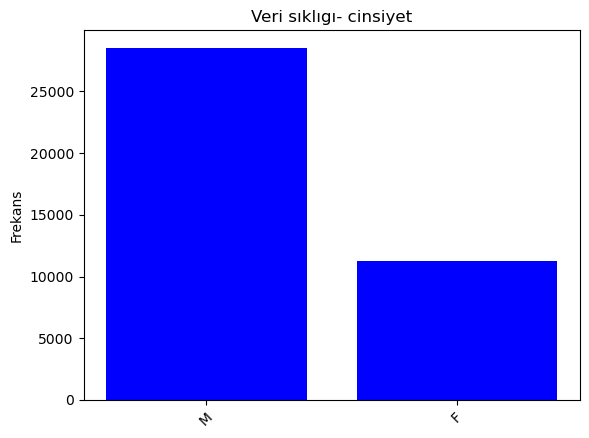

cinsiyet:
M    28530
F    11253
Name: cinsiyet, dtype: int64


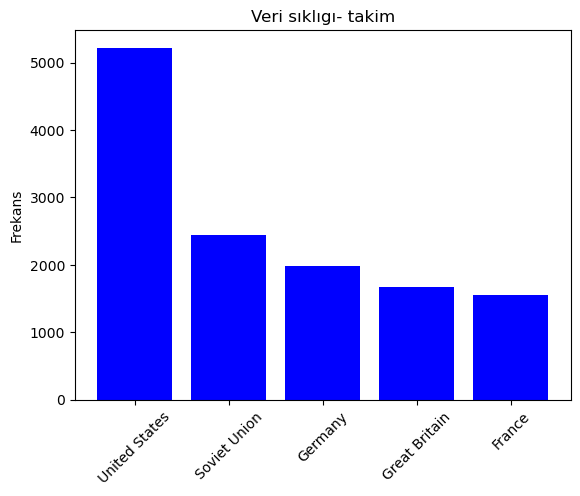

takim:
United States    5219
Soviet Union     2451
Germany          1984
Great Britain    1673
France           1550
Name: takim, dtype: int64


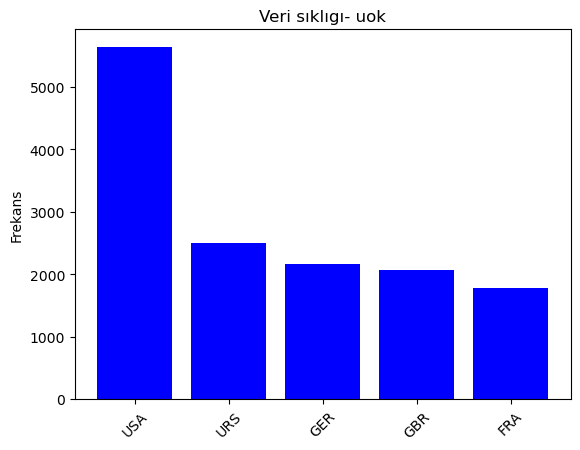

uok:
USA    5637
URS    2503
GER    2165
GBR    2068
FRA    1777
Name: uok, dtype: int64


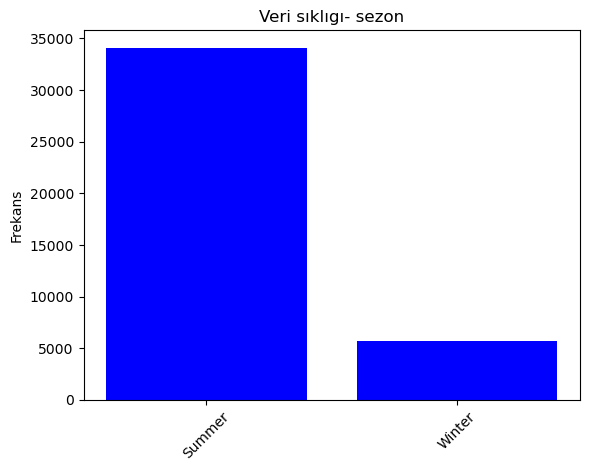

sezon:
Summer    34088
Winter     5695
Name: sezon, dtype: int64


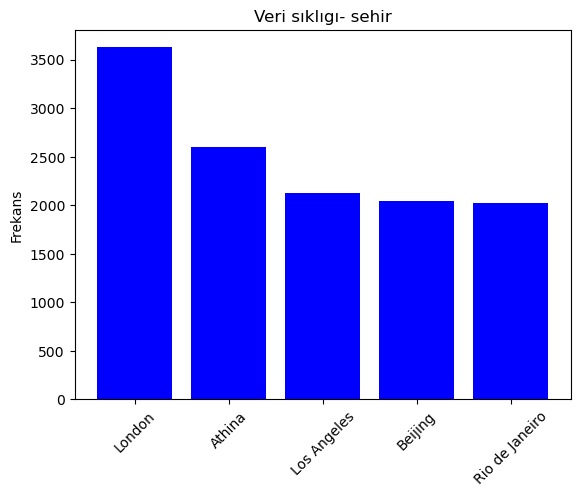

sehir:
London            3624
Athina            2602
Los Angeles       2123
Beijing           2048
Rio de Janeiro    2023
Name: sehir, dtype: int64


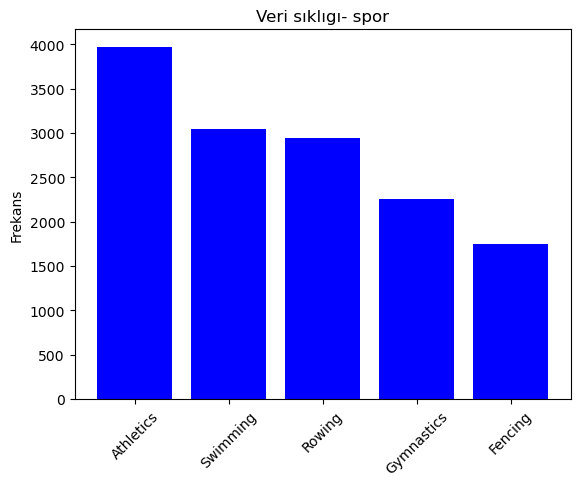

spor:
Athletics     3969
Swimming      3048
Rowing        2945
Gymnastics    2256
Fencing       1743
Name: spor, dtype: int64


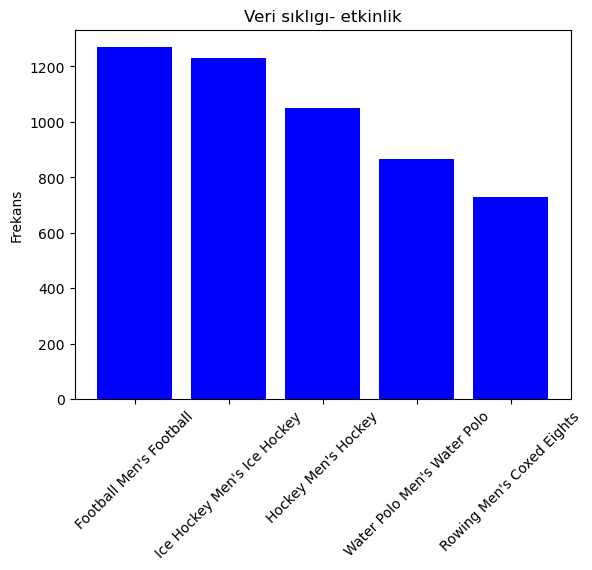

etkinlik:
Football Men's Football        1269
Ice Hockey Men's Ice Hockey    1230
Hockey Men's Hockey            1050
Water Polo Men's Water Polo     866
Rowing Men's Coxed Eights       730
Name: etkinlik, dtype: int64


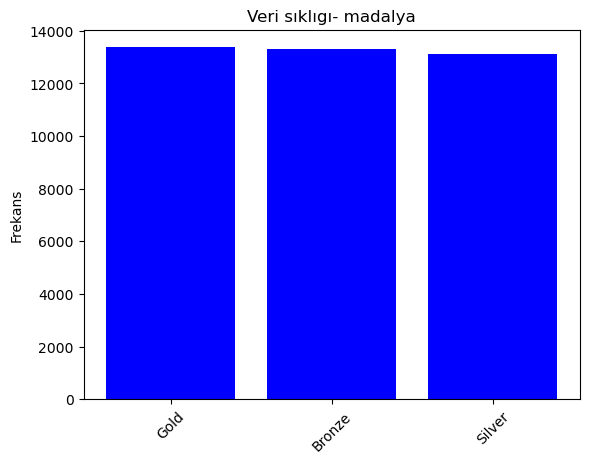

madalya:
Gold      13372
Bronze    13295
Silver    13116
Name: madalya, dtype: int64


In [17]:
#çubuk grafiklerini çizdireceğimiz metod:
def plotBar(degisken,n=5):
    """
    Girdi:değişken/Sütun ismi
        n=Gösterilecek eşsiz değer sayısı
    Çıktı: Çubuk grafiği
    """
    veri_=veri[degisken]
    veri_sayma=veri_.value_counts()
    veri_sayma=veri_sayma[:n]
    plt.figure()
    plt.bar(veri_sayma.index,veri_sayma,color="blue")
    plt.xticks(veri_sayma.index,veri_sayma.index.values)
    plt.xticks(rotation=45)
    plt.ylabel("Frekans")
    plt.title("Veri sıklıgı- {}".format(degisken))
    plt.show()
    print("{}:\n{}".format(degisken,veri_sayma))

kategorik_degiskenler=["isim","cinsiyet","takim","uok","sezon","sehir","spor","etkinlik","madalya"]

for i in kategorik_degiskenler:
    plotBar(i)

2 DEĞİŞKENLİ VERİ ANALİZİ


In [18]:
#Cinsiyete göre boy ve ağırlık

erkek=veri[veri.cinsiyet=="M"]
erkek.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze


In [19]:
kadin=veri[veri.cinsiyet=="F"]
kadin.head()

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
79,Ragnhild Margrethe Aamodt,F,27.0,163.00,68.88,Norway,NOR,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold
91,Willemien Aardenburg,F,22.0,166.13,60.53,Netherlands,NED,1988,Summer,Seoul,Hockey,Hockey Women's Hockey,Bronze
105,Ann Kristin Aarnes,F,23.0,182.00,64.00,Norway,NOR,1996,Summer,Atlanta,Football,Football Women's Football,Bronze
161,Patimat Abakarova,F,21.0,165.00,49.00,Azerbaijan,AZE,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze
163,Mariya Vasilyevna Abakumova (-Tarabina),F,22.0,179.00,80.00,Russia,RUS,2008,Summer,Beijing,Athletics,Athletics Women's Javelin Throw,Silver


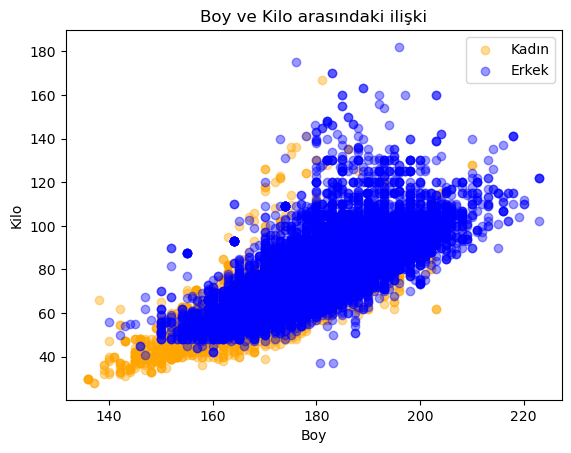

In [20]:
plt.figure()
plt.scatter(kadin.boy,kadin.kilo,alpha=0.4,label="Kadın",color="orange")
plt.scatter(erkek.boy,erkek.kilo,alpha=0.4,label="Erkek",color="blue")
plt.xlabel("Boy")
plt.ylabel("Kilo")
plt.title("Boy ve Kilo arasındaki ilişki")
plt.legend()
plt.show()

Noktalar bu derece iç içe geçtiğinde 2 boyutlu görsellendirme de yapılabilir.

In [21]:
veri.loc[:,["yas","boy","kilo"]].corr()

,yas,boy,kilo
yas,1.000000,0.061890,0.136349
boy,0.061890,1.000000,0.794368
kilo,0.136349,0.794368,1.000000


In [22]:
#Madalya ve yaş arasında ilişki ?
#sporcuları altın,gümüş ve bronza göre ayıralım
#pd.get_dummies() fonksiyonu, kategorik değişkenleri ikili(0,1) değerlere dönüştürmek için kullanılan bir p
veri_gecici=veri.copy()
veri_gecici=pd.get_dummies(veri_gecici,columns=["madalya"])
veri_gecici.head()

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,1,0
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,1,0,0
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,1,0,0
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,1,0,0
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,1,0,0


In [23]:
veri_gecici.loc[:,["yas","madalya_Bronze","madalya_Gold","madalya_Silver"]].corr()


,yas,madalya_Bronze,madalya_Gold,madalya_Silver
yas,1.000000,-0.005584,-0.002576,0.008192
madalya_Bronze,-0.005584,1.000000,-0.504110,-0.496859
madalya_Gold,-0.002576,-0.504110,1.000000,-0.499022
madalya_Silver,0.008192,-0.496859,-0.499022,1.000000


**Yaş ile madalya alma arasında herhangi bir ilişki bulunmadığı açıktır.**

In [24]:
#takımların kazandıkları madalya sayıları

veri_gecici[["takim","madalya_Bronze","madalya_Gold","madalya_Silver"]].groupby(["takim"],as_index=False).sum().sort_values(by="madalya_Gold",ascending=False)[:10]


,takim,madalya_Bronze,madalya_Gold,madalya_Silver
462,United States,1233,2474,1512
403,Soviet Union,677,1058,716
165,Germany,678,679,627
215,Italy,484,535,508
171,Great Britain,572,519,582
149,France,577,455,518
420,Sweden,507,451,476
198,Hungary,365,432,330
67,Canada,408,422,413
117,East Germany,263,369,309


In [25]:
#Kazanılan madalyaların hangi şehirlerde kazanıldığı
veri_gecici[["sehir","madalya_Bronze","madalya_Gold","madalya_Silver"]].groupby(["sehir"],as_index=False).sum().sort_values(by="madalya_Gold",ascending=False)[:10]


,sehir,madalya_Bronze,madalya_Gold,madalya_Silver
17,London,1214,1215,1195
3,Athina,860,883,859
18,Los Angeles,706,726,691
6,Beijing,710,671,667
27,Rio de Janeiro,703,665,655
38,Sydney,680,663,661
4,Atlanta,629,608,605
5,Barcelona,604,559,549
33,Seoul,549,520,513
2,Antwerpen,367,493,448


In [26]:
#cinsiyete göre kazanılan madalyalar
veri_gecici[["cinsiyet","madalya_Bronze","madalya_Gold","madalya_Silver"]].groupby(["cinsiyet"],as_index=False).sum().sort_values(by="madalya_Gold",ascending=False)


,cinsiyet,madalya_Bronze,madalya_Gold,madalya_Silver
1,M,9524,9625,9381
0,F,3771,3747,3735


**Pivot Tablosu**

Pivot tablo, veritabanı, iş zekası programı ya da veri tablosu gibi, daha geniş bir tabloyu özetleyen istatistik tablosudur.Bu özet, pivot tabloyu anlamlı bir şekilde gruplayan toplamları, ortalamaları veya diğer istatistikleri içerebilir.

In [27]:
veri_pivot=veri.pivot_table(index="madalya",columns="cinsiyet",
                            values=["boy","kilo","yas"],aggfunc={"boy":np.mean,"kilo":np.mean,"yas":[min,max,np.std]})

veri_pivot.head()

boy                   kilo              yas              \
                mean                   mean              max         min   
cinsiyet           F           M          F          M     F     M     F   
madalya                                                                    
Bronze    170.003227  180.045806  62.757125  77.841504  69.0  72.0  12.0   
Gold      170.448727  180.318906  63.199349  78.186505  63.0  64.0  13.0   
Silver    170.233783  180.053626  62.866892  77.960887  55.0  73.0  11.0   

                                    
                     std            
cinsiyet     M         F         M  
madalya                             
Bronze    10.0  5.329229  5.870340  
Gold      13.0  5.219615  5.987807  
Silver    13.0  5.253111  6.098221

**Anomali Tespiti**

Aykırı değer, diğer gözlemlerden önemli ölçüde farklı bir veri noktasıdır.Bir aykırı değer, ölçümdeki değişkenliğe bağlı olabilir veya deneysel hatayı gösterebilir; ikincisi bazen veri kümesinden çıkarılır. Bir aykırı değer istatistiksel analizlerde ciddi sorunlara neden olabilir.

In [28]:
def anomaliTespitiYap(df,feature):
    outlier_indices=[]

    for c in feature:
        #1.çeyrek
        Q1=np.percentile(df[c],25)
        #3.çeyrek
        Q3=np.percentile(df[c],75)
        #IQR=Inter Quartile Range #çeyrekler açıklığı
        IQR=Q3-Q1
        #aykırı değer için ek adım miktarı
        outlier_step=1.5 * IQR
        #aykırı değeri ve de bulunduğu index tespiti
        outlier_list_col=df[(df[c]<Q1-outlier_step) |(df[c]> Q3+outlier_step)].index
        #print(f"Aykırı değerler {c} için tespit edilen indexler: {outlier_list_col}")

        #tespit edilen indexleri depola
        outlier_indices.extend(outlier_list_col)

        #Eşsiz aykırı değerleri bulalım

    outlier_indices=Counter(outlier_indices)

        #Eğer bir örnek v adet sütunda farklı değer ise bunu aykırı kabul edelim
    multiple_outliers=[i for i, v in outlier_indices.items() if v>1]
    return multiple_outliers

In [29]:
anomali_features=["kilo","boy","yas"]
veri_anomali=veri.loc[anomaliTespitiYap(veri,anomali_features)]
print(veri_anomali.spor.value_counts())
 #Anomalinin en çok görüldüğü spor branşları



Basketball        64
Gymnastics        34
Handball           6
Athletics          5
Sailing            3
Diving             3
Figure Skating     1
Wrestling          1
Shooting           1
Name: spor, dtype: int64


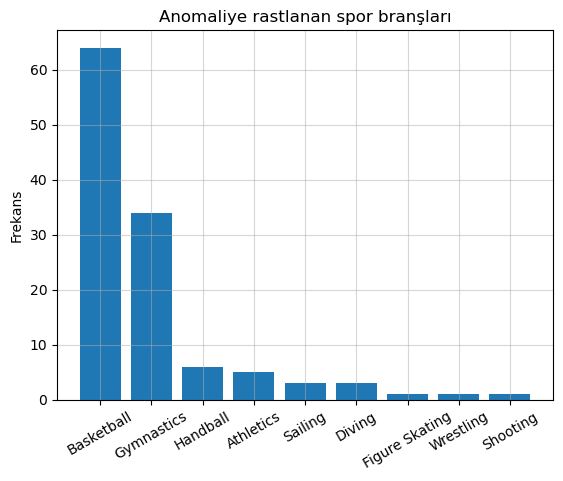

In [30]:
plt.figure()
plt.bar(veri_anomali.spor.value_counts().index,veri_anomali.spor.value_counts().values)
plt.xticks(rotation=30)
plt.title("Anomaliye rastlanan spor branşları")
plt.ylabel("Frekans")
plt.grid(True,alpha=0.5) #Izgara 
plt.show()

In [31]:
veri_gym=veri_anomali[veri_anomali.spor=="Gymnastics"]
veri_gym.head(7)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
13741,Oana Mihaela Ban,F,18.0,139.0,36.0,Romania,ROU,2004,Summer,Athina,Gymnastics,Gymnastics Women's Team All-Around,Gold
21260,Bi Wenjing,F,14.0,142.0,35.0,China,CHN,1996,Summer,Atlanta,Gymnastics,Gymnastics Women's Uneven Bars,Silver
23763,Loredana Boboc,F,16.0,139.0,32.0,Romania,ROU,2000,Summer,Sydney,Gymnastics,Gymnastics Women's Team All-Around,Gold
47452,Laura Cutina,F,15.0,143.0,36.0,Romania,ROU,1984,Summer,Los Angeles,Gymnastics,Gymnastics Women's Team All-Around,Gold
53751,Deng Linlin,F,16.0,144.0,34.0,China,CHN,2008,Summer,Beijing,Gymnastics,Gymnastics Women's Team All-Around,Gold
53759,Deng Linlin,F,20.0,144.0,34.0,China,CHN,2012,Summer,London,Gymnastics,Gymnastics Women's Balance Beam,Gold
69216,Mariya Yevgenyevna Filatova (-Kurbatova),F,14.0,136.0,30.0,Soviet Union,URS,1976,Summer,Montreal,Gymnastics,Gymnastics Women's Team All-Around,Gold


In [32]:
veri_gym.etkinlik.value_counts()

Gymnastics Women's Team All-Around          21
Gymnastics Women's Uneven Bars               6
Gymnastics Women's Balance Beam              3
Gymnastics Women's Floor Exercise            2
Gymnastics Women's Individual All-Around     1
Gymnastics Women's Horse Vault               1
Name: etkinlik, dtype: int64

In [33]:
veri_basketbol=veri_anomali[veri_anomali.spor=="Basketball"]
veri_basketbol.head(7)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
8834,Franjo Arapovi,M,23.0,211.0,120.0,Yugoslavia,YUG,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Silver
8835,Franjo Arapovi,M,27.0,211.0,120.0,Croatia,CRO,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Silver
21577,Oleksandr Mykhailovych Bielostienniy,M,21.0,214.0,117.0,Soviet Union,URS,1980,Summer,Moskva,Basketball,Basketball Men's Basketball,Bronze
21578,Oleksandr Mykhailovych Bielostienniy,M,29.0,214.0,117.0,Soviet Union,URS,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Gold
25598,"Carlos Austin Boozer, Jr.",M,22.0,206.0,117.0,United States,USA,2004,Summer,Athina,Basketball,Basketball Men's Basketball,Bronze
25599,"Carlos Austin Boozer, Jr.",M,26.0,206.0,117.0,United States,USA,2008,Summer,Beijing,Basketball,Basketball Men's Basketball,Gold
40096,Roberto Chiacig,M,29.0,210.0,118.0,Italy,ITA,2004,Summer,Athina,Basketball,Basketball Men's Basketball,Silver


In [34]:
veri_basketbol.etkinlik.value_counts()

Basketball Men's Basketball      62
Basketball Women's Basketball     2
Name: etkinlik, dtype: int64

In [35]:
bayan=veri_basketbol[veri_basketbol.cinsiyet=="F"]
bayan

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
216267,Ujana Semjonova,F,24.0,210.0,128.0,Soviet Union,URS,1976,Summer,Montreal,Basketball,Basketball Women's Basketball,Gold
216268,Ujana Semjonova,F,28.0,210.0,128.0,Soviet Union,URS,1980,Summer,Moskva,Basketball,Basketball Women's Basketball,Gold


**ZAMAN SERİLERİNDE VERİ ANALİZİ**

YILLARA GÖRE ORTALAMA YAŞ BOY VE KİLO DEĞİŞİMİ
YILLARA GÖRE MADALYA SAYILARI

In [36]:
veri_zaman=veri.copy()
veri_zaman

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...
271078,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.00,80.00,Soviet Union,URS,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver
271080,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.00,80.00,Soviet Union,URS,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze
271082,Bogusaw Zych,M,28.0,182.00,82.00,Poland,POL,1980,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",Bronze
271102,Olesya Nikolayevna Zykina,F,19.0,171.00,64.00,Russia,RUS,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze


In [37]:
essiz_yillar=veri_zaman.yil.unique()
essiz_yillar

array([1900, 1920, 2014, 1948, 1952, 1992, 1994, 2002, 2006, 2008, 1988,
       1996, 1960, 1912, 1956, 2016, 2012, 2000, 2004, 1980, 1984, 1936,
       1906, 1964, 1972, 1924, 1904, 1932, 1928, 1968, 1976, 2010, 1908,
       1998, 1896], dtype=int64)

In [38]:
sirali_array=np.sort(essiz_yillar)
sirali_array

array([1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
       1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988,
       1992, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012,
       2014, 2016], dtype=int64)

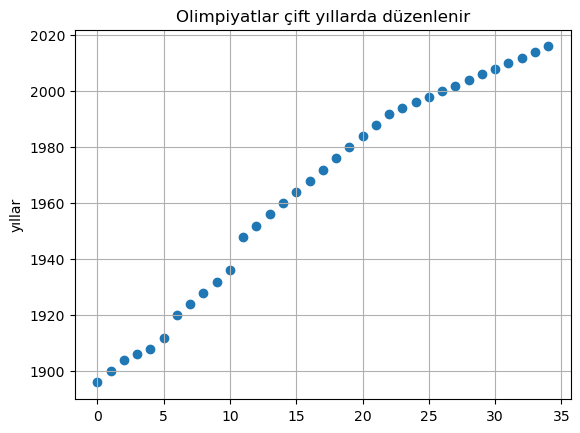

In [39]:
plt.figure()
plt.scatter(range(len(sirali_array)),sirali_array) #saçılım grafiği
plt.grid(True)
plt.ylabel("yıllar")
plt.title("Olimpiyatlar çift yıllarda düzenlenir")
plt.show()

Grafikteki 2 boşluk, dünya savaşları yüzünden olimpiyatların yapılamadığını gösterir.Hemen ardından 1980den sonra ise noktaların artmasının sebebi, yaz ve kış olimpiyatları olmak üzere 2 yılda bir yapılmaya başlanmasını göstermektedir.

In [40]:
#veri içerisinde bulunan yılları datetime veri tipine dönüştürelim.

tarih_saat=pd.to_datetime(veri_zaman.yil,format="%Y")
print(type(tarih_saat))
tarih_saat.head(3)

<class 'pandas.core.series.Series'>


3    1900-01-01
37   1920-01-01
38   1920-01-01
Name: yil, dtype: datetime64[ns]

In [41]:
veri_zaman["tarih_saat"]=tarih_saat
veri_zaman.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya,tarih_saat
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1900-01-01
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,1920-01-01
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,1920-01-01


In [42]:
# veri_zaman değişkeninin ana indexini, datetime tipi olan tarih_saat değerine güncelleyelim
veri_zaman=veri_zaman.set_index("tarih_saat")
veri_zaman.drop(["yil"],axis=1,inplace=True)
veri_zaman.head()

,isim,cinsiyet,yas,boy,kilo,takim,uok,sezon,sehir,spor,etkinlik,madalya
tarih_saat,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
2014-01-01,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
1948-01-01,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [43]:
#Yıllara göre ortalama yaş,boy,kilo değişimi

periyodik_veri=veri_zaman.resample("2A").mean() #2 yıllık periyotlar halinde ortalama alır.count
periyodik_veri.tail()

C:\Users\Ertuğrul\AppData\Local\Temp\ipykernel_16020\25348271.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  periyodik_veri=veri_zaman.resample("2A").mean() #2 yıllık periyotlar halinde ortalama alır.count


,yas,boy,kilo
tarih_saat,,,
2008-12-31,26.046875,178.299761,74.263145
2010-12-31,26.723077,175.759615,72.840615
2012-12-31,26.066461,178.305755,73.726399
2014-12-31,26.644891,175.353434,71.756499
2016-12-31,26.325260,178.371740,73.963772


In [44]:
#kayıp verileri cıkaralım
periyodik_veri.dropna(axis=0, inplace=True)
periyodik_veri.head()

,yas,boy,kilo
tarih_saat,,,
1896-12-31,23.905734,174.280350,72.734056
1900-12-31,27.786689,177.882301,74.979950
1904-12-31,26.363868,177.241091,74.330823
1906-12-31,26.479389,176.347576,74.072183
1908-12-31,27.566739,176.662419,73.721107


<Figure size 640x480 with 0 Axes>

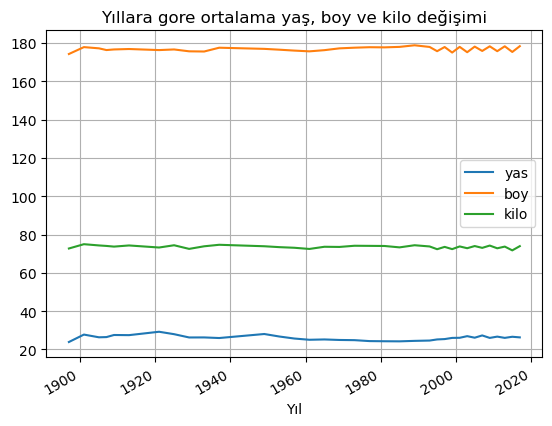

In [45]:
plt.figure()
periyodik_veri.plot()
plt.title("Yıllara gore ortalama yaş, boy ve kilo değişimi")
plt.xlabel("Yıl")
plt.grid(True)
plt.show()

In [46]:
#Yıllara göre madalya sayıları

veri_zaman=pd.get_dummies(veri_zaman,columns=["madalya"])
veri_zaman.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,1,0
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,1,0,0
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,1,0,0


In [53]:
periyodik_veri=veri_zaman.resample("2A").sum()
#periyodik_veri.head()
periyodik_veri=periyodik_veri[~(periyodik_veri==0).any(axis=1)]
periyodik_veri.tail()

C:\Users\Ertuğrul\AppData\Local\Temp\ipykernel_16020\3838021483.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  periyodik_veri=veri_zaman.resample("2A").sum()


,yas,boy,kilo,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,
2008-12-31,53344.0,365157.91,152090.92,710,671,667
2010-12-31,13896.0,91395.00,37877.12,171,174,175
2012-12-31,50595.0,346091.47,143102.94,679,632,630
2014-12-31,15907.0,104686.00,42838.63,198,202,197
2016-12-31,53256.0,360846.03,149628.71,703,665,655


<Figure size 640x480 with 0 Axes>

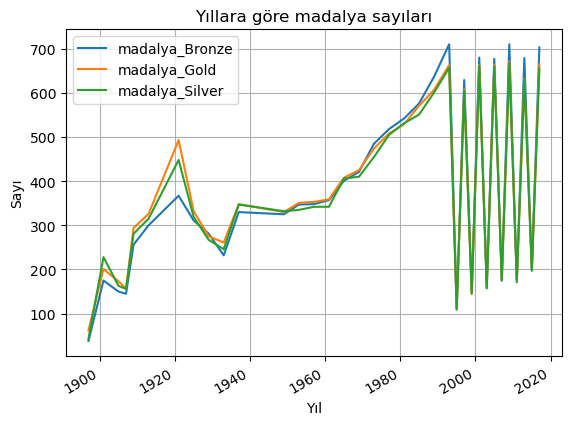

In [54]:
plt.figure()
periyodik_veri.loc[:,["madalya_Bronze","madalya_Gold","madalya_Silver"]].plot()
plt.title("Yıllara göre madalya sayıları")
plt.ylabel("Sayı")
plt.xlabel("Yıl")
plt.grid(True)
plt.show()

In [56]:
#Yıllara ve sezonlara göre madalya sayıları

yaz=veri_zaman[veri_zaman.sezon=="Summer"]
kis=veri_zaman[veri_zaman.sezon=="Winter"]

In [57]:
periyodik_veri_kis=kis.resample("A").sum()
periyodik_veri_kis=periyodik_veri_kis[~(periyodik_veri_kis==0).any(axis=1)]
periyodik_veri_kis.head()

C:\Users\Ertuğrul\AppData\Local\Temp\ipykernel_16020\2067109539.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  periyodik_veri_kis=kis.resample("A").sum()


,yas,boy,kilo,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,
1924-12-31,3919.60,22867.28,9703.58,37,55,38
1928-12-31,2265.56,15745.75,6862.50,31,30,28
1932-12-31,2431.00,16357.71,7067.76,28,32,32
1936-12-31,2742.00,19123.20,8101.88,35,36,37
1948-12-31,3643.00,23942.51,10375.92,46,41,48


In [58]:
periyodik_veri_yaz=yaz.resample("A").sum()
periyodik_veri_yaz=periyodik_veri_yaz[~(periyodik_veri_yaz==0).any(axis=1)]
periyodik_veri_yaz.head()

C:\Users\Ertuğrul\AppData\Local\Temp\ipykernel_16020\3535622982.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  periyodik_veri_yaz=yaz.resample("A").sum()


,yas,boy,kilo,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,
1896-12-31,3418.52,24922.09,10400.97,38,62,43
1900-12-31,16783.16,107440.91,45287.89,175,201,228
1904-12-31,12812.84,86139.17,36124.78,150,173,163
1906-12-31,12127.56,80767.19,33925.06,145,157,156
1908-12-31,22907.96,146806.47,61262.24,256,294,281


<Figure size 640x480 with 0 Axes>

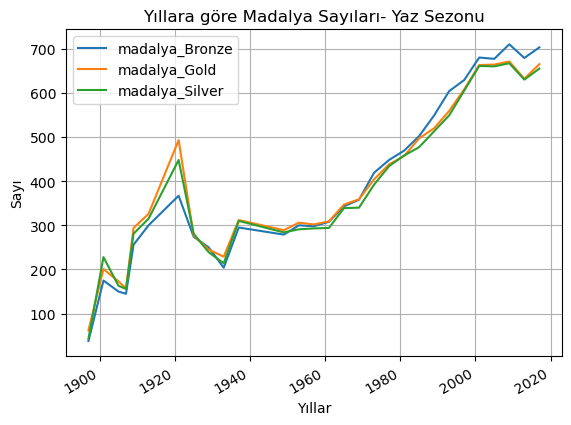

In [59]:
plt.figure()
periyodik_veri_yaz.loc[:,["madalya_Bronze","madalya_Gold","madalya_Silver"]].plot()
plt.title("Yıllara göre Madalya Sayıları- Yaz Sezonu")
plt.xlabel("Yıllar")
plt.ylabel("Sayı")
plt.grid(True)
plt.show()

<Figure size 640x480 with 0 Axes>

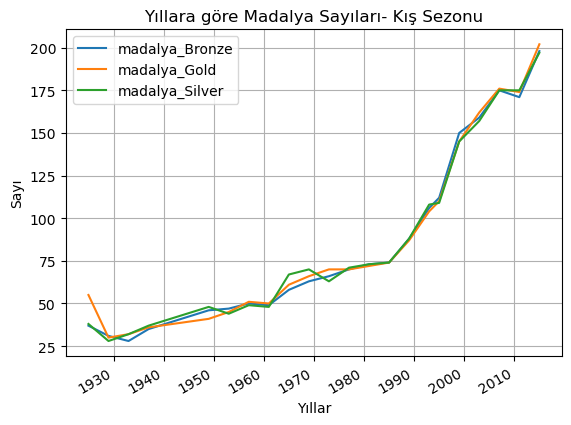

In [60]:
plt.figure()
periyodik_veri_kis.loc[:,["madalya_Bronze","madalya_Gold","madalya_Silver"]].plot()
plt.title("Yıllara göre Madalya Sayıları- Kış Sezonu")
plt.xlabel("Yıllar")
plt.ylabel("Sayı")
plt.grid(True)
plt.show()

**VERİ GÖRSELLEŞTİRME**

***ÖRNEKLER***

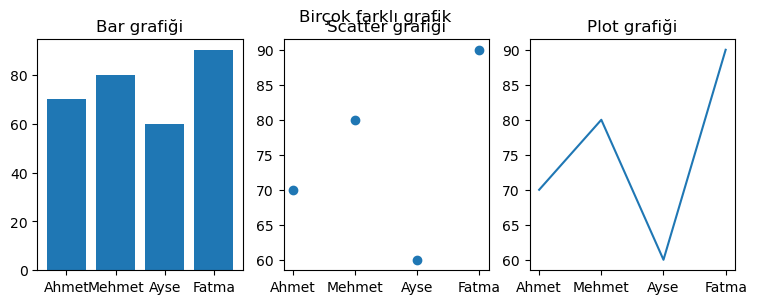

In [62]:
names=["Ahmet","Mehmet","Ayse","Fatma"]
values=[70,80,60,90]

plt.figure(figsize=(9,3))
plt.subplot(131)
plt.title("Bar grafiği")
plt.bar(names,values)

plt.subplot(132)
plt.title("Scatter grafiği")
plt.scatter(names,values)

plt.subplot(133)
plt.title("Plot grafiği")
plt.plot(names,values)

plt.suptitle("Birçok farklı grafik")
plt.show()


In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [64]:
data=pd.read_csv("olimpiyat_madalyali.csv")
data.head()

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
0,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
2,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
3,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
4,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


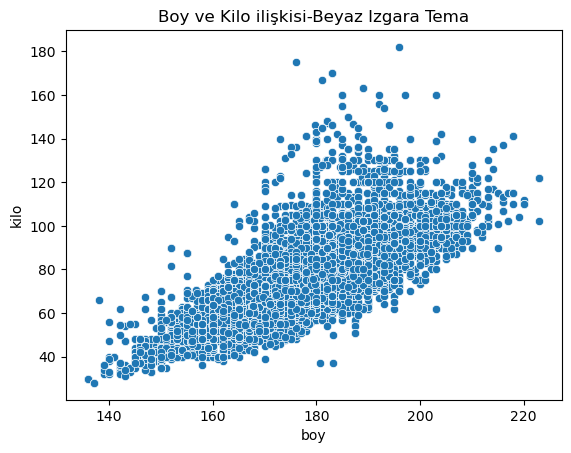

In [65]:
#Saçılım grafiği: iki farklı değişkenin arasındaki ilişkiyi belirlemek için kullanılır.

def sacilimGrafikCiz():
    sns.scatterplot(x="boy",y="kilo",data=data)
    plt.title("Boy ve Kilo ilişkisi-Beyaz Izgara Tema")
    plt.show()

sacilimGrafikCiz()

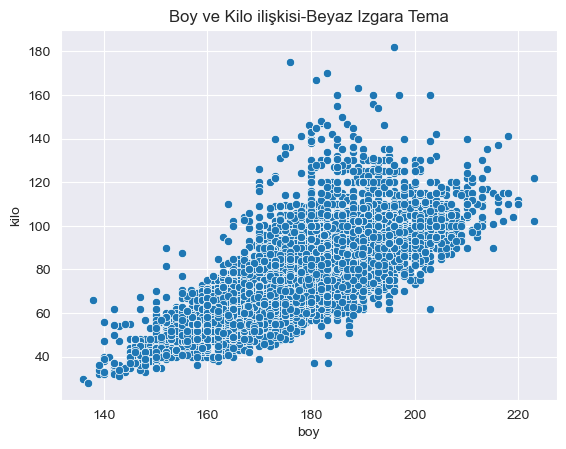

In [66]:
sns.set_style("darkgrid")
sacilimGrafikCiz()

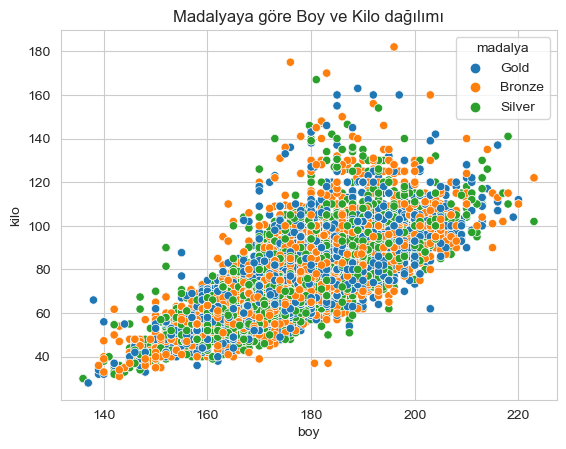

In [67]:
sns.set_style("whitegrid")
sns.scatterplot(x="boy",y="kilo",hue="madalya",data=data) #hue,madalyaya göre dağılım yapmayı sağladı
plt.title("Madalyaya göre Boy ve Kilo dağılımı")
plt.show()

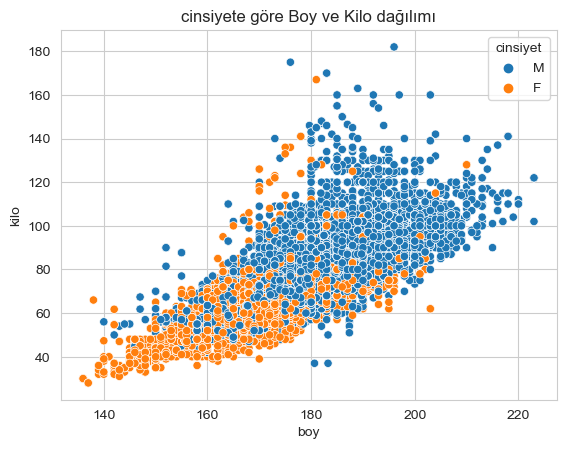

In [68]:
sns.set_style("whitegrid")
sns.scatterplot(x="boy",y="kilo",hue="cinsiyet",data=data) 
plt.title("cinsiyete göre Boy ve Kilo dağılımı")
plt.show()

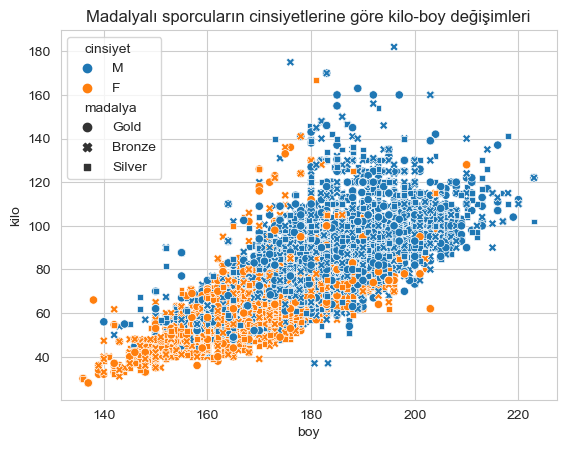

In [69]:
#4 boyutlu görselleştirme
sns.set_style("whitegrid")
sns.scatterplot(x="boy",y="kilo",hue="cinsiyet",style="madalya",data=data) 
plt.title("Madalyalı sporcuların cinsiyetlerine göre kilo-boy değişimleri")
plt.show()

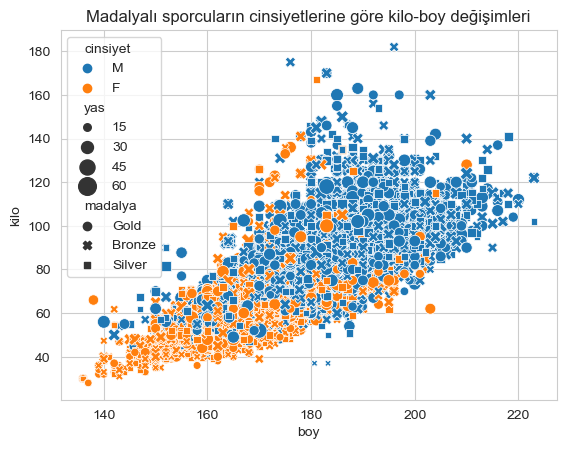

In [70]:
#5 boyutlu görselleştirme
sns.set_style("whitegrid")
sns.scatterplot(x="boy",y="kilo",hue="cinsiyet",style="madalya",size="yas",sizes=(15,200),data=data) 
plt.title("Madalyalı sporcuların cinsiyetlerine göre kilo-boy değişimleri")
plt.show()

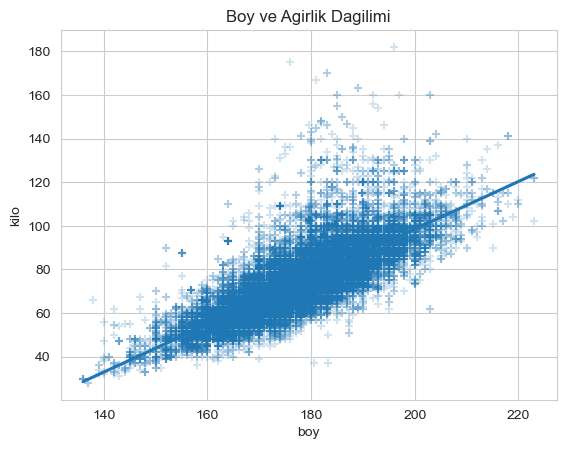

In [71]:
#Saçılım Grafiği- Doğrusal Regresyon

sns.regplot(x="boy",y="kilo",data=data,marker="+",scatter_kws={"alpha":0.2})
plt.title("Boy ve Agirlik Dagilimi")
plt.show()


Doğrusal regresyon sonucu oluşan, doğrunun eğiminin pozitif olmasından anlaşılacağı üzere boy ve kilo arasında pozitif ilişki vardır.

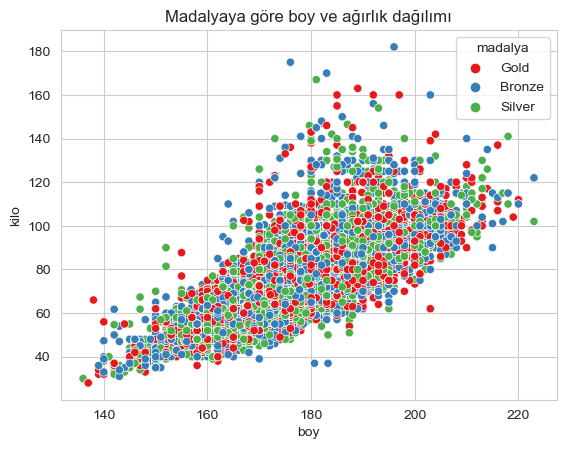

In [72]:
#Renk paletleri

sns.scatterplot(x="boy",y="kilo",hue="madalya",data=data,palette="Set1")
plt.title("Madalyaya göre boy ve ağırlık dağılımı")
plt.show()

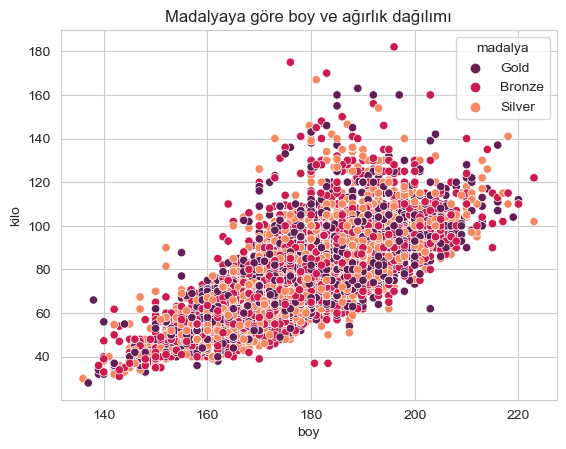

In [73]:
sns.scatterplot(x="boy",y="kilo",hue="madalya",data=data,palette="rocket")
plt.title("Madalyaya göre boy ve ağırlık dağılımı")
plt.show()

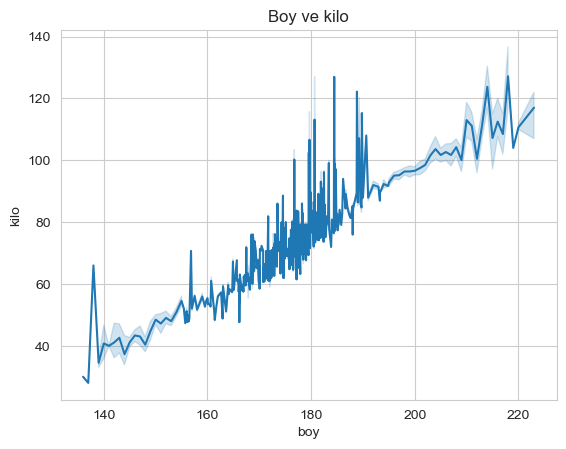

In [74]:
#Çizgi grafiği
sns.lineplot(x="boy",y="kilo",data=data)
plt.title("Boy ve kilo")
plt.show()

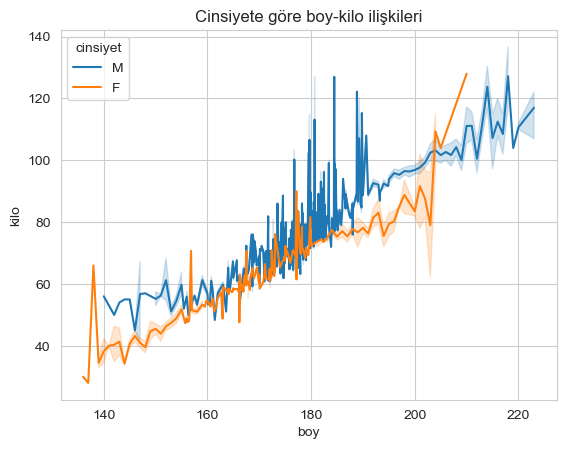

In [76]:
#Çizgi grafiği- Kategorik
sns.lineplot(x="boy",y="kilo",hue="cinsiyet",data=data)
plt.title("Cinsiyete göre boy-kilo ilişkileri")
plt.show()

# Histogram

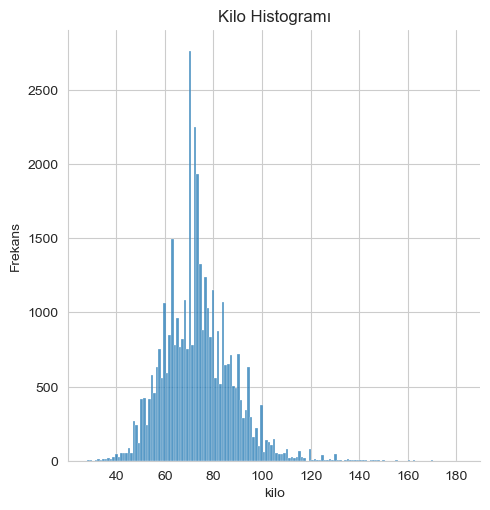

In [77]:
sns.displot(data,x="kilo")
plt.ylabel("Frekans")
plt.title("Kilo Histogramı")
plt.show()

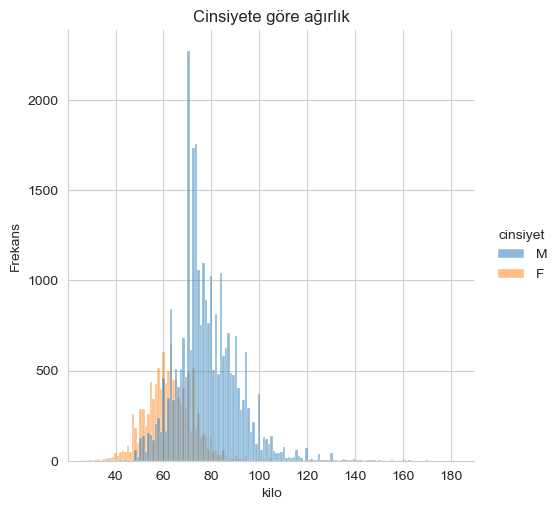

In [78]:
sns.displot(data,x="kilo",hue="cinsiyet")
plt.ylabel("Frekans")
plt.title("Cinsiyete göre ağırlık")
plt.show()

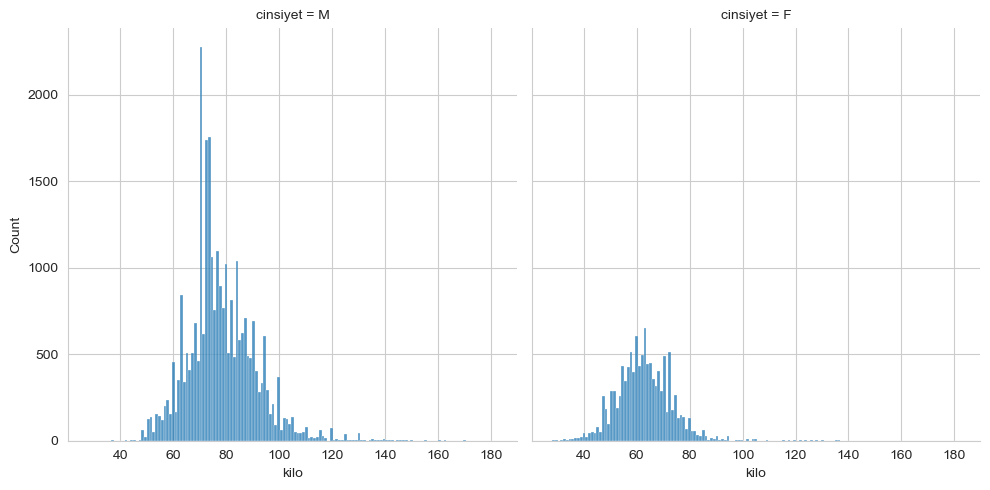

In [79]:
sns.displot(data,x="kilo",col="cinsiyet",multiple="dodge")
plt.show()

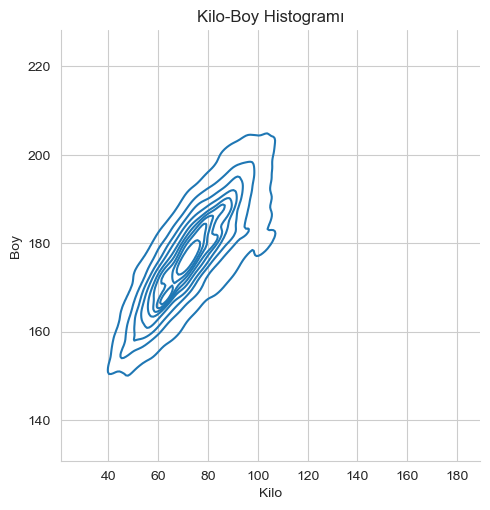

In [80]:
# 2 Boyutlu histogram

sns.displot(data,x="kilo",y="boy",kind="kde")
plt.xlabel("Kilo")
plt.ylabel("Boy")
plt.title("Kilo-Boy Histogramı")
plt.show()

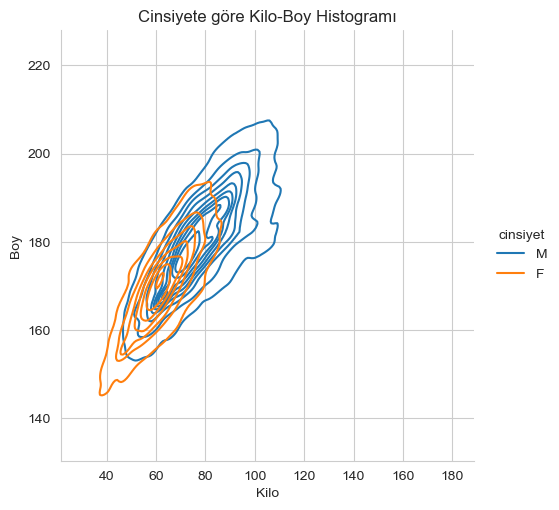

In [81]:
sns.displot(data,x="kilo",y="boy",hue="cinsiyet",kind="kde")
plt.xlabel("Kilo")
plt.ylabel("Boy")
plt.title("Cinsiyete göre Kilo-Boy Histogramı")
plt.show()

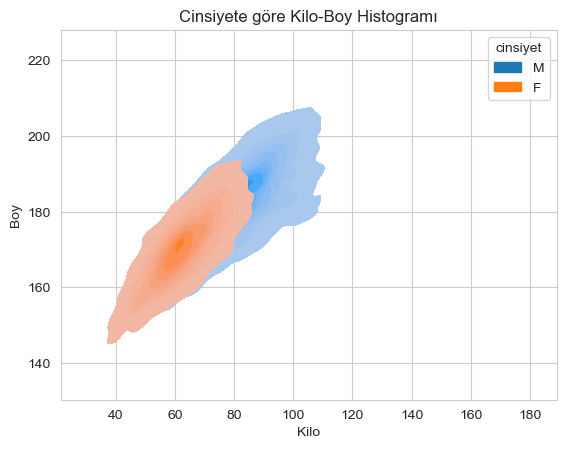

In [82]:
sns.kdeplot(data,x="kilo",y="boy",hue="cinsiyet",fill=True)
plt.xlabel("Kilo")
plt.ylabel("Boy")
plt.title("Cinsiyete göre Kilo-Boy Histogramı")
plt.show()

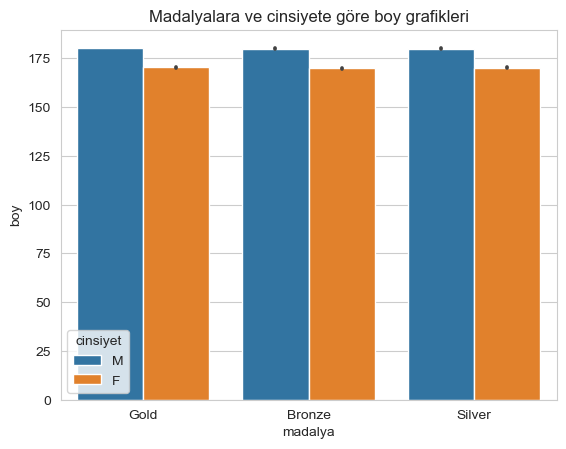

In [83]:
sns.barplot(data,x="madalya",y="boy",hue="cinsiyet")
plt.title("Madalyalara ve cinsiyete göre boy grafikleri")
plt.show()

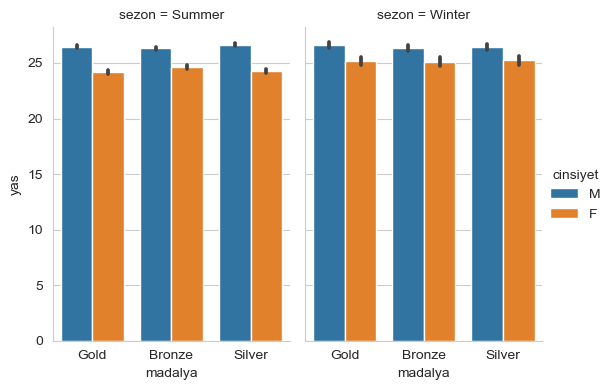

In [85]:
sns.catplot(x="madalya",y="yas",hue="cinsiyet",col="sezon",data=data,kind="bar",height=4,aspect=0.7)
plt.show()

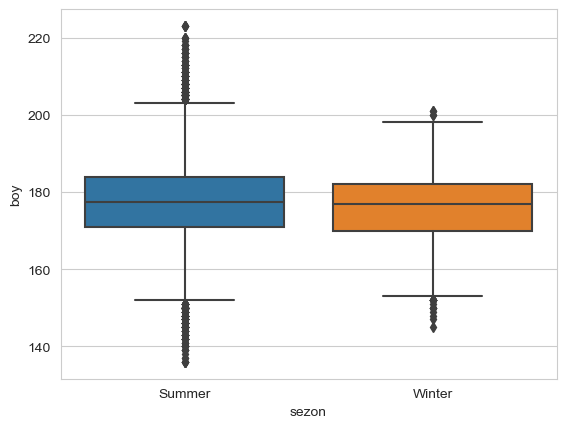

In [86]:
#Kutu grafiği
sns.boxplot(veri,x="sezon",y="boy")
plt.show()

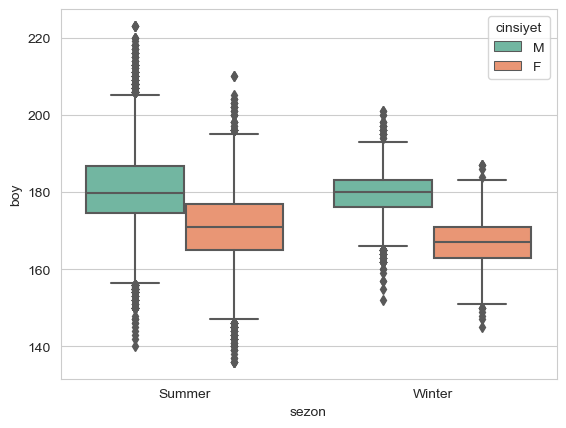

In [87]:
sns.boxplot(veri,x="sezon",y="boy",hue="cinsiyet",palette="Set2")
plt.show()

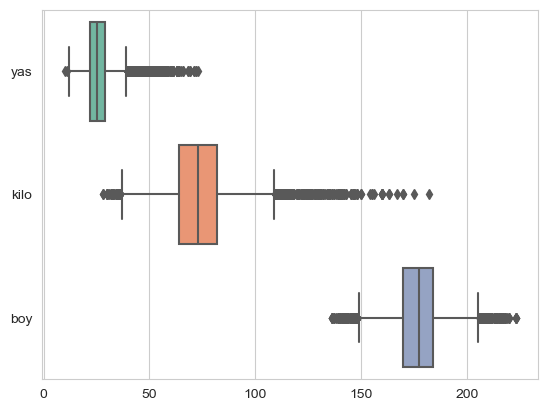

In [88]:
data_gecici=data.loc[:,["yas","kilo","boy"]]
sns.boxplot(data=data_gecici,orient="h",palette="Set2") #horizontal, default=dikey
plt.show()

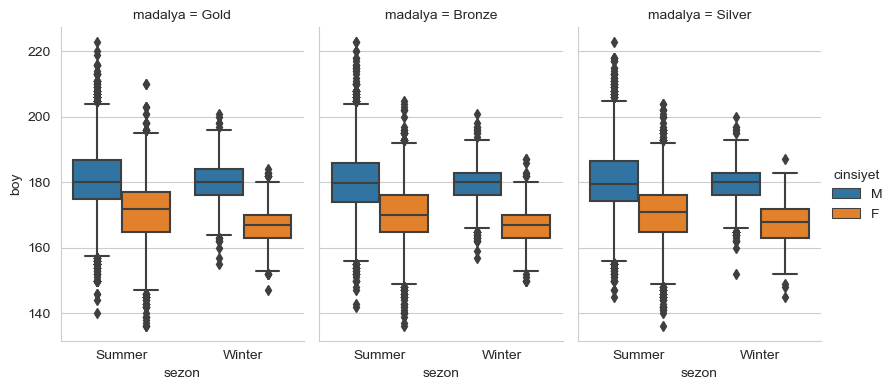

In [89]:
sns.catplot(x="sezon",y="boy",hue="cinsiyet",col="madalya",data=data,kind="box",height=4,aspect=0.7)
plt.show()

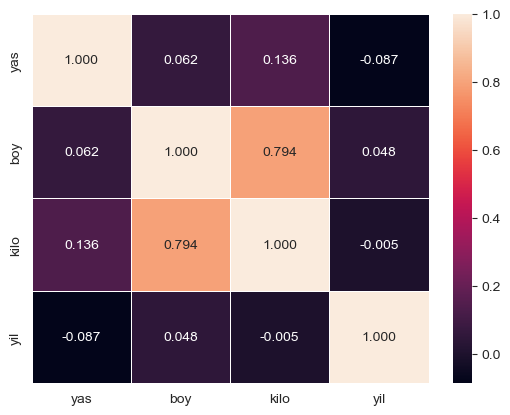

In [93]:
#Isı Haritası

sns.heatmap(data.corr(),annot=True,linewidths=0.5,fmt=".3f") #bir basamak yaz #annot=False deseydik içine değerleri yazmazdı.
plt.show()


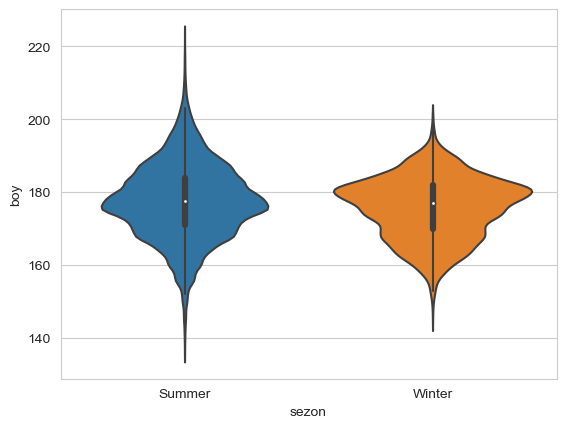

In [96]:
#Keman grafiği
#sayısal verilieri çizme yöntemi, kutu grafiğine benzer yorumlanır.

sns.violinplot(x="sezon",y="boy",data=veri)
plt.show()

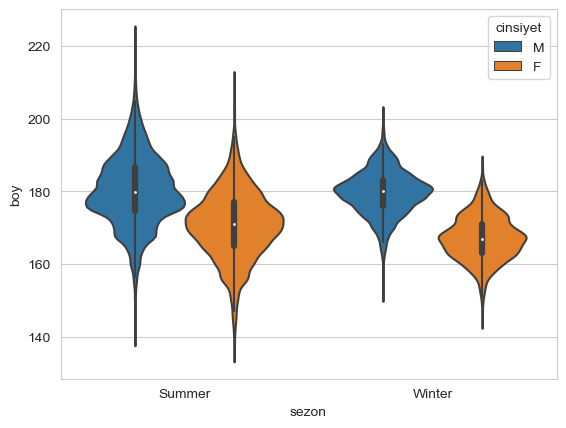

In [97]:
sns.violinplot(x="sezon",y="boy",hue="cinsiyet",data=veri)
plt.show()

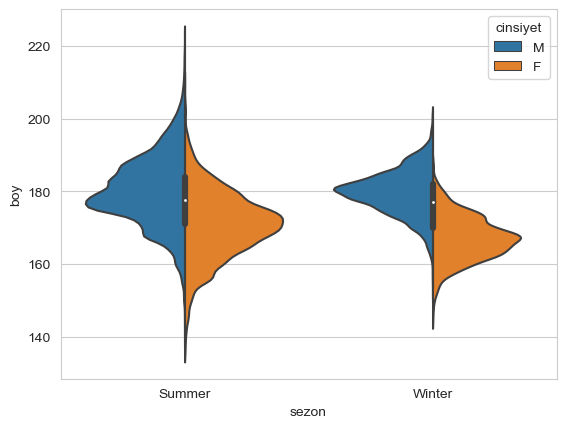

In [98]:
sns.violinplot(x="sezon",y="boy",data=veri,hue="cinsiyet",split=True) #yan yana fazla çizmeyi engelledik, kemanlar simetrik olduğu için diğer yarısına öteki cinsiyeti çiziyor.
plt.show()


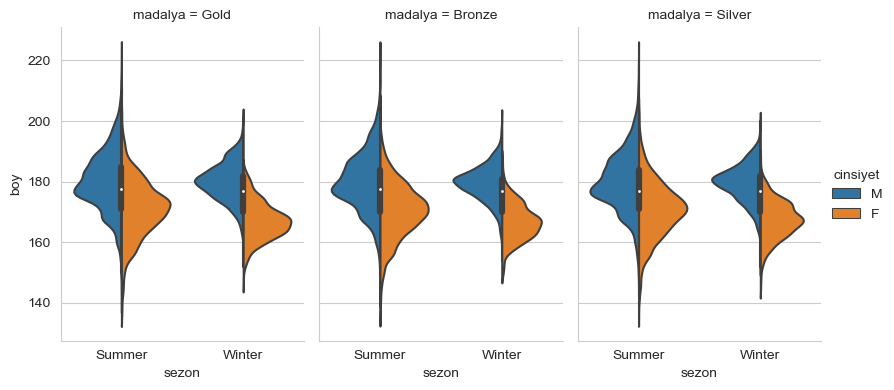

In [99]:
sns.catplot(x="sezon",y="boy",hue="cinsiyet",col="madalya",data=data,kind="violin",split=True,height=4,aspect=0.7)
plt.show()

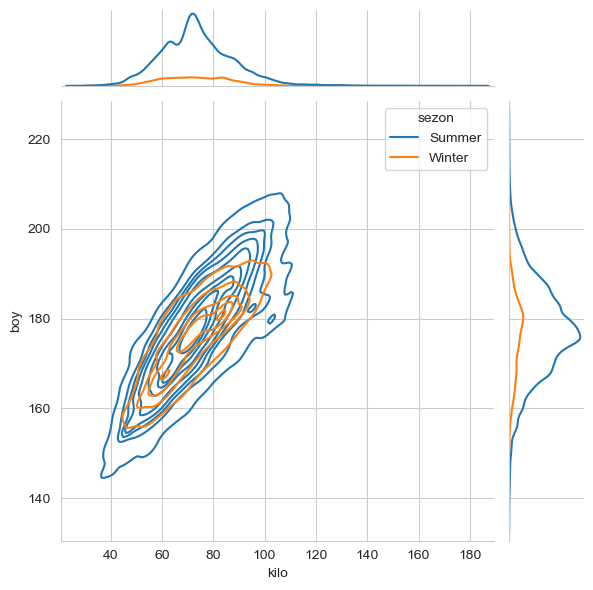

In [100]:
#Ortaklık Grafiği #ne vereyim abime tarzı grafikler
#Farklı özellikler arasındaki ilişkiyi farklı görselleştirme yöntemleri kullanarak incelemeye yarayan grafiktir.
sns.jointplot(data=data,x="kilo",y="boy",hue="sezon",kind="kde")
plt.show()

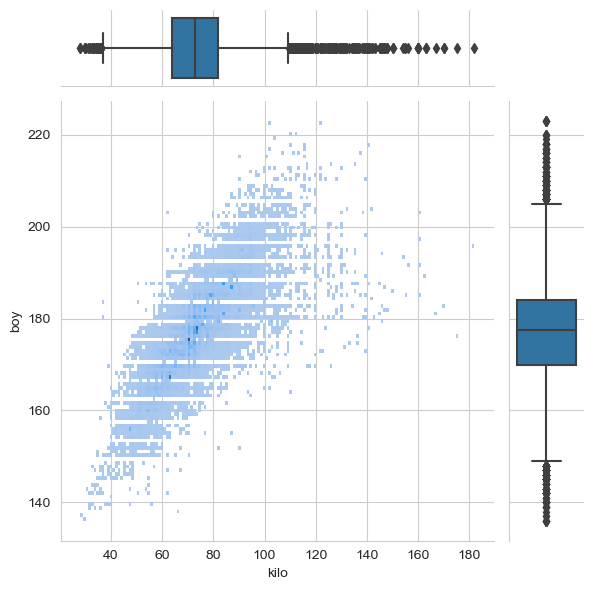

In [101]:
#Çoklu grafikler
g=sns.JointGrid(data=data,x="kilo",y="boy")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot) #kenarlarda ne olsun
plt.show()

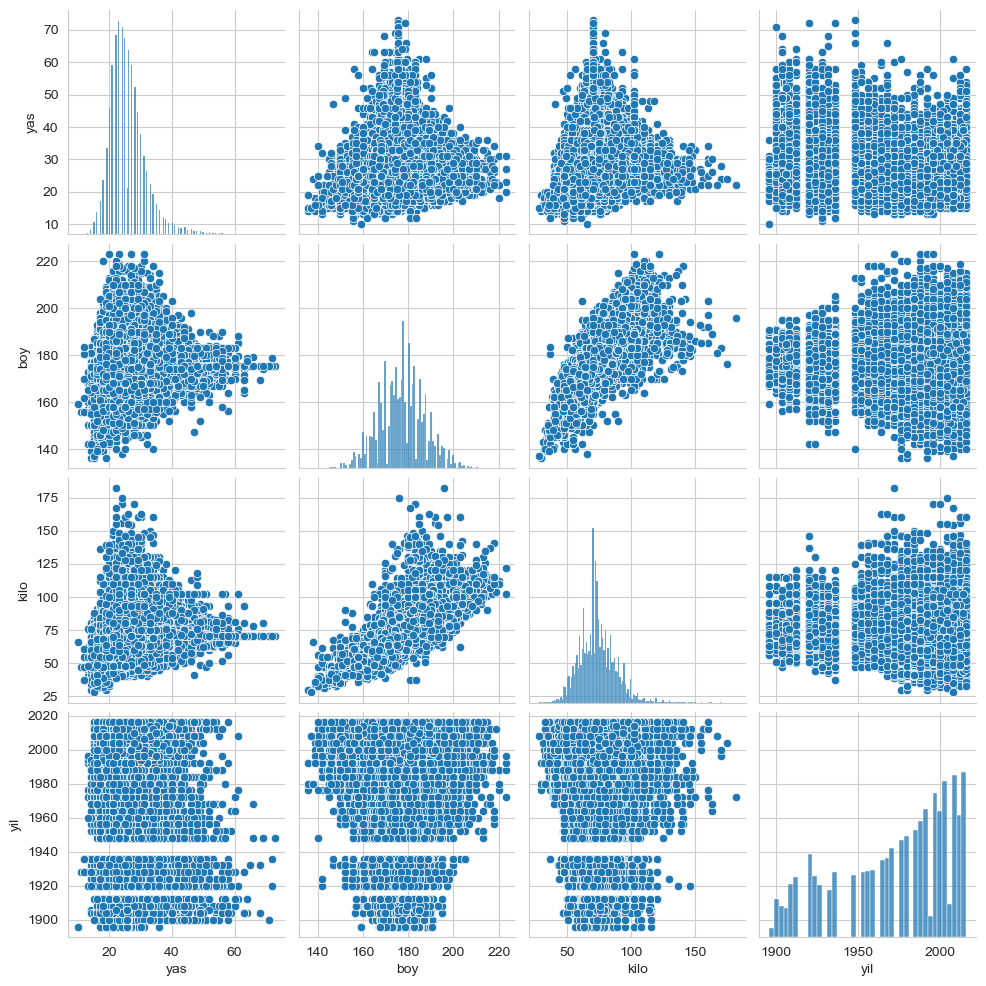

In [102]:
#numeric 4 veri için 4e4lük grafik oluşturdu
#Çift/Eş Grafiği
sns.pairplot(data)
plt.show()

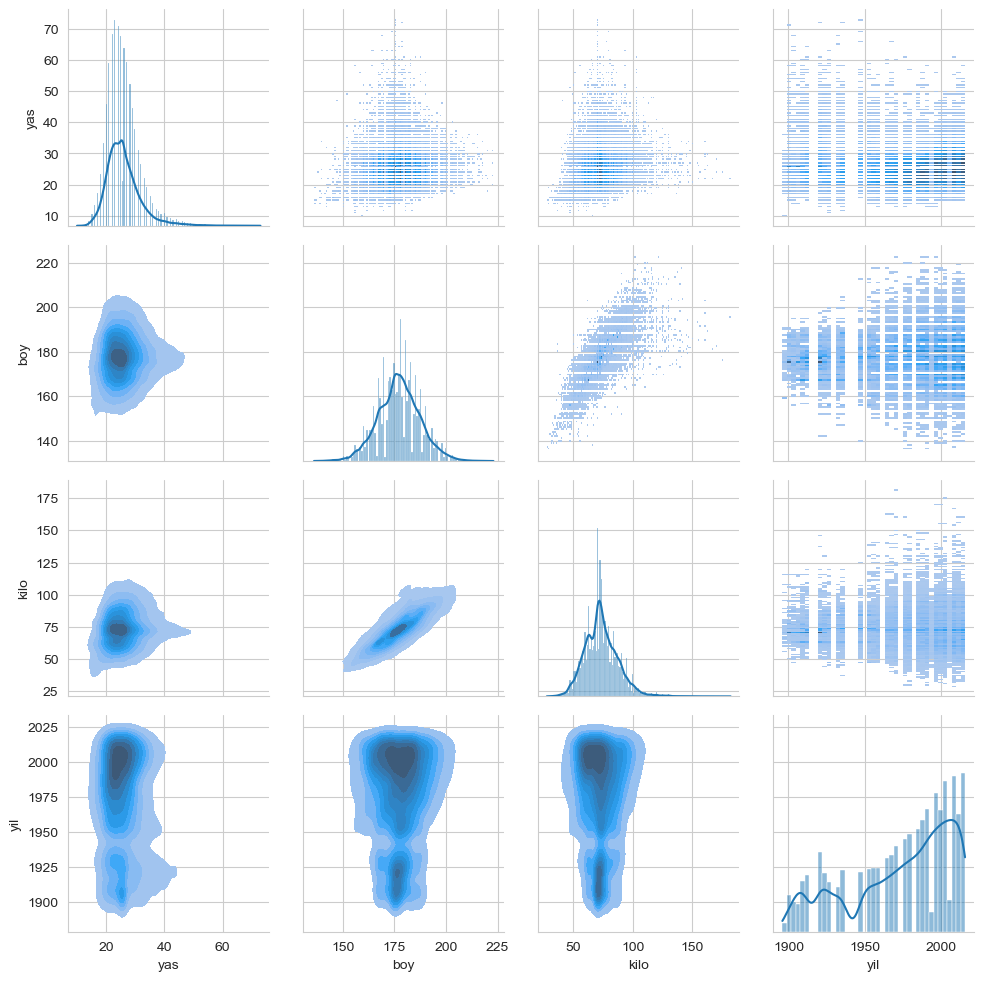

In [103]:
g=sns.PairGrid(data)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot,fill=True)
g.map_diag(sns.histplot,kde=True)



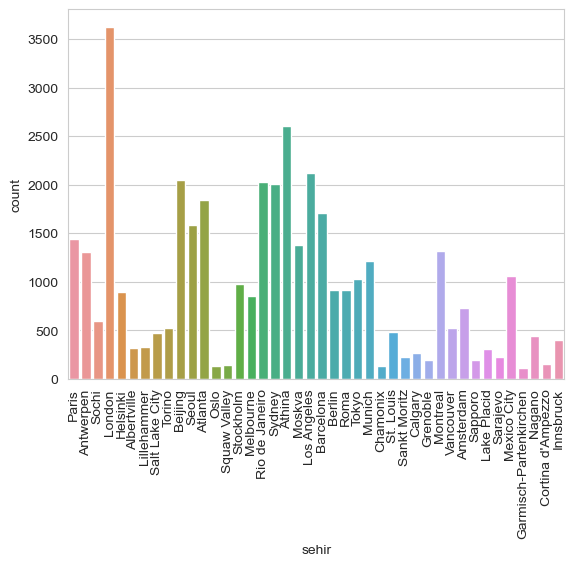

In [106]:
#Sayma grafiği
sns.countplot(x="sehir",data=data)
plt.xticks(rotation=90)
plt.show()

# Plotly Kütüphanesi


In [107]:
#Dashboard oluşturmaya yarayan çeşitli fonksiyonlar içeren çevrimiçi kütüphane.
from plotly.offline import init_notebook_mode,iplot,plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.io as pio 
import plotly.figure_factory as ff


In [108]:
newdata=pd.read_csv("universite_siralamasi_20220204.csv")
newdata.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


In [109]:
newdata.columns

Index(['world_rank', 'university_name', 'country', 'teaching', 'international',
       'research', 'citations', 'income', 'total_score', 'num_students',
       'student_staff_ratio', 'international_students', 'female_male_ratio',
       'year'],
      dtype='object')

In [110]:
newdata.rename(columns={"world_rank":"dunya_siralama",
                        "university_name":"uni_isim",
                        "country":"ulke",
                        "teaching":"ogretim",
                        "international":"uluslararasi",
                        "research":"arastirma",
                        "citations":"alinti",
                        "income":"gelir",
                        "total_score":"toplam_puan",
                        "num_students":"ogrenci_sayisi",
                        "student_staff_ratio":"ogrenci_calisan_orani",
                        "international_students":"uluslararasi_ogrenci",
                        "female_male_ratio":"kadin_erkek_orani",
                        "year":"yil"},inplace=True)
newdata.head()

,dunya_siralama,uni_isim,ulke,ogretim,uluslararasi,arastirma,alinti,gelir,toplam_puan,ogrenci_sayisi,ogrenci_calisan_orani,uluslararasi_ogrenci,kadin_erkek_orani,yil
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


In [111]:
#Çizgi Grafiği
df=newdata.iloc[:100,:]
df.head(3)

,dunya_siralama,uni_isim,ulke,ogretim,uluslararasi,arastirma,alinti,gelir,toplam_puan,ogrenci_sayisi,ogrenci_calisan_orani,uluslararasi_ogrenci,kadin_erkek_orani,yil
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011


In [112]:
#plotly stilleri

pio.templates.default="simple_white"

In [115]:
cizgi1=go.Scatter(x=df.dunya_siralama,y=df.alinti,mode="lines+markers",name="Alıntı",marker=dict(color="rgba(78,78,250,0.85)"),text=df.uni_isim)
cizgi2=go.Scatter(x=df.dunya_siralama,y=df.ogretim,mode="lines+markers",name="Egitim-Ogretim-Faaliyetleri",marker=dict(color="rgba(250,40,15,0.85)"),text=df.uni_isim)

veri=[cizgi1,cizgi2]
yerlesim=dict(title="Dünya Sıralamasında ilk 100 Universitenin atıf ve egitim-ögretim puanları",xaxis=dict(title="Dunya Sıralaması",ticklen=5,zeroline=False))
fig=dict(data=veri,layout=yerlesim)
plot(fig,filename="1_cizgi-alinti-ogretim_puanlari.html")



'1_cizgi-alinti-ogretim_puanlari.html'

In [119]:
veri2014=df[df.yil==2011].iloc[:5,:]
cizgi1=go.Bar(x=veri2014.uni_isim,
              y=veri2014.alinti,
              name="Alıntı",
              marker=dict(color="rgba(78,78,250,0.85)",
              line=dict(color="rgb(0,0,0)",width=1.5)),
              text=veri2014.ulke)
cizgi2=go.Bar(x=veri2014.uni_isim,
              y=veri2014.ogretim,
              name="Egitim-Ogretim-Faaliyet",
              marker=dict(color="rgba(250,0,78,0.85)",
              line=dict(color="rgb(0,0,0)",width=1.5)),
              text=veri2014.ulke)
veri_=[cizgi1,cizgi2]
yerlesim=go.Layout(barmode="group")
fig=go.Figure(data=veri_,layout=yerlesim)
plot(fig,filename="2_çubuk-alinti-ogretim_puanlari.html")


'2_çubuk-alinti-ogretim_puanlari.html'

In [121]:
#Dairesel Grafik

veri2011=df[df.yil==2011].iloc[:8,:]
dilim1=veri2011.ogrenci_sayisi
dilim1_liste=[float(each.replace(",","."))for each in veri2011.ogrenci_sayisi]
etiketler=veri2011.uni_isim

cizgi=go.Pie(labels=etiketler,
             values=dilim1_liste,
             hoverinfo="label+value+percent",
             textinfo="value+percent",
             textfont=dict(size=8),
             rotation=180,
             hole=0.3,
             marker=dict(line=dict(color="#000000",width=1)))

veri_=[cizgi]
yerlesim=dict(title="2011 Yılı-İlk 8 Universite Ogrenci Sayıları ve Oranları",legend=dict(orientation="h"))
fig=dict(data=veri_,layout=yerlesim)
plot(fig,filename="3_dairesel-ogrenci_sayisi.html")


'3_dairesel-ogrenci_sayisi.html'

In [124]:
#Kabarcık grafiği
veri2011=df[df.yil==2011].iloc[:20,:]
ogrenci_sayisi=[float(each.replace(",","."))for each in veri2011.ogrenci_sayisi]
uluslararasi_renk=[float(each) for each in veri2011.uluslararasi]

data=[{"y":veri2011.ogretim,
       "x":veri2011.dunya_siralama,
       "mode":"markers",
       "marker":{"color":uluslararasi_renk,"size":ogrenci_sayisi,"showscale":True},
       "text":veri2011.uni_isim}]
plot(data,filename="4_kabarcik-ogrenci_sayisi.html")


ValueError: could not convert string to float: '-'